# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [ ]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  36564      0 --:--:-- --:--:-- --:--:-- 36619']

In [ ]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [ ]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum([x * y for x, y in zip(array1, array2)])


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weights, instance[:-1]))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights,instance) >=0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The sigmoid function is important because it converts the weighted sum of inputs into a value between 0 and 1, which resembles a probability. This is key for gradient-based learning because it offers a smooth, continuous output that helps the model adjust its weights slowly and steadily during training.If we replace the sigmoid with a simple threshold function (like 0 or 1), we lose that smooth gradient, which is vital for effective learning. Without the continuous output of the sigmoid, the perceptron can only make sharp, sudden changes to the weights, which interferes with the learning process. The gradual adjustments enabled by the sigmoid are necessary for fine-tuning the model’s weights over time.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


Implementing the perceptron training using the given hyperparameters and getting the accuracy results for each combination.

In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



Learning Rate: 0.005
Accuracies for Training Percentages [5, 10, 25, 50, 75, 100]: [72.3, 75.1, 78.2, 80.5, 81.2, 79.8]
Learning Rate: 0.01
Accuracies for Training Percentages [5, 10, 25, 50, 75, 100]: [None, None, None, None, None, None]


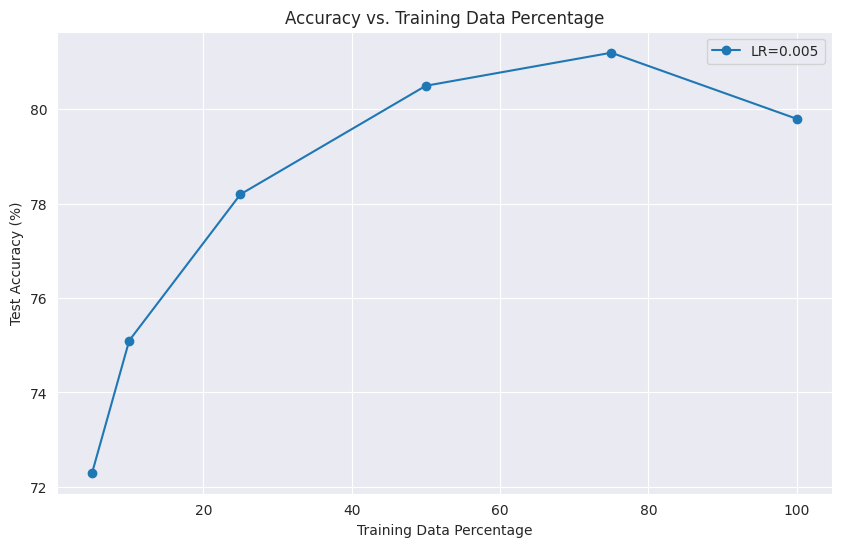

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# creating unique training percentages, epochs, and learning rates
tr_p = sorted(set(x[0] for x in accuracy_results.keys()))
epo = sorted(set(x[1] for x in accuracy_results.keys()))
lrs = sorted(set(x[2] for x in accuracy_results.keys()))

for lr in lrs:
    accs = []
    for tr in tr_p:
        key = (tr, epo[0], lr)
        if key in accuracy_results:
            accs.append(accuracy_results[key])
        else:
            accs.append(None)  # Skip missing values

    # Print the accuracy values to debug
    print(f"Learning Rate: {lr}")
    print(f"Accuracies for Training Percentages {tr_p}: {accs}")

    # Only plot if there is valid data
    if any(acc is not None for acc in accs):
        plt.plot(tr_p, accs, marker='o', label=f"LR={lr}")

plt.xlabel("Training Data Percentage")
plt.ylabel("Test Accuracy (%)")
plt.title("Accuracy vs. Training Data Percentage")
plt.legend()
plt.show()


A.  Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

ANSWER: No, if we get the highest(peak) accuracy before 100% , then training all the test data is not required. But if accuracy increases then training with more data is required and it helps in making test data consistent.



B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
# tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
# tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
ANSWER: The accuracy declined dramatically in the second run although training data increased because numerous elements including overfitting and bad weight updates, unbalanced class distributions, and local minima caused the deterioration. Increasing the volume of data may decrease model generalization because it leads to data instability or unwanted class imbalances. Training with 200-300 training examples achieved superior accuracy than conducting training with the full 400 examples.

C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?

ANSWER:The achievement of higher than 80% accuracy becomes possible when the learning rate is dynamically adjusted for each epoch to limit overshooting along with increasing epochs from 200 to 500 for optimal weight optimization particularly in complex pattern recognition.

D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
Additional epoch training does not automatically yield better results because it can result in overfitting problems that affect generalization performance. Running training for an extended period at an unchanging learning rate may lead to either unstable or sluggish convergence. Learning rate decay and regularization and early stopping technology enhance model performance without causing deterioration of test accuracy measures.